# Exploring Data to determine pipelines

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Corrections to make for null values:

- All nan starting outs is 0 (first pitch at bat result after lineup change at beginning of innning)
- Players table - pull from the json to ensure all players are listed on the table, not just the players that were on the current depth chart when pulled
    - looking into API again to see if there is a more complete list before resorting to the API JSON files
- weather - imputer nearest neigbors or determine if relevant
- at bat end time - either use the game scheduled time or fix the json pull and re-merge (to look into)
- investigate the missing pitching information (intentional walks?)

In [4]:
data = pd.read_csv('../raw_data/final_raw_data.csv', index_col="id").drop(columns="Unnamed: 0")
players = pd.read_csv("../raw_data/players.csv")
at_bats = pd.read_csv('../raw_data/all_data_merged.csv')

/tmp/ipykernel_39268/10792598.py:3: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  at_bats = pd.read_csv('../raw_data/all_data_merged.csv')


In [5]:
players.head(2)

,id,status,position,primary_position,first_name,last_name,preferred_name,jersey_number,depth,team_id,team_nickname
0,5a5c2129-3f87-43ee-8f6b-a2b6ca91bab4,A,OF,LF,Matthew,Marlowe,Cade,18.0,1,43a39081-52b4-4f93-ad29-da7f329ea960,Mariners
1,c59cd03a-ead5-41d4-9b4a-d26f0dd04ea6,A,OF,LF,Dominic,Canzone,Dominic,8.0,2,43a39081-52b4-4f93-ad29-da7f329ea960,Mariners


In [6]:
players[players["id"] == "e910dcd2-1b23-4b6f-85f6-be74938fa3e7"]

,id,status,position,primary_position,first_name,last_name,preferred_name,jersey_number,depth,team_id,team_nickname


In [7]:
at_bats[at_bats["id"] == 'c125610e-5eb5-4ebc-b8f0-3cf2606d67f4']

,Unnamed: 0.1,id,game_id,inning,side,hitter_id,hitter_hand,pitcher_id,pitcher_hand,description,temp_f,weather_condition,humidity,wind_speed_mph,play_outcome,mc_target,y_target,Unnamed: 0,status,coverage,game_number,day_night,scheduled,home_team_id,away_team_id,attendance,duration,double_header,entry_mode,reference,venue,home,away,broadcast,rescheduled,stadium_id,hitter_status,hitter_position,hitter_primary_position,hitter_first_name,hitter_last_name,hitter_preferred_name,hitter_jersey_number,hitter_depth,hitter_team_id,hitter_team_nickname,pitcher_status,pitcher_position,pitcher_primary_position,pitcher_first_name,pitcher_last_name,pitcher_preferred_name,pitcher_jersey_number,pitcher_depth,pitcher_team_id,pitcher_team_nickname,home_team_name,home_team_market,home_team_abbr,away_team_name,away_team_market,away_team_abbr,stadium_name,stadium_market,stadium_capacity,stadium_surface,stadium_address,stadium_city,stadium_state,stadium_zip,stadium_country,stadium_field_orientation,stadium_stadium_type,stadium_time_zone,stadium_lat,stadium_lon,away_stadium_id,away_stadium_name,away_stadium_market,away_stadium_capacity,away_stadium_surface,away_stadium_address,away_stadium_city,away_stadium_state,away_stadium_zip,away_stadium_country,away_stadium_field_orientation,away_stadium_stadium_type,away_stadium_time_zone,away_stadium_lat,away_stadium_lon,at_bat_end_time,pitch_type_code,pitch_type_des,pitch_speed_mph,pitch_count_at_bat,pitcher_pitch_count_at_bat_start,outs_at_start,output_code
130479,130479,c125610e-5eb5-4ebc-b8f0-3cf2606d67f4,e92144d5-c547-4914-ad03-73b151aa154d,9,T,24a794bb-adde-4f27-abb9-a762a6a4da2f,L,e910dcd2-1b23-4b6f-85f6-be74938fa3e7,R,Mike Tauchman walks.,80.0,Partly cloudy,41.0,13.0,walk,1,1,1724,closed,full,1,N,2023-08-09T23:10:00+00:00,f246a5e5-afdb-479c-9aaa-c68beeda7af6,55714da8-fcaf-4574-8443-59bfb511a524,37527.0,3:06,False,STOMP,717062,"{'name': 'Citi Field', 'market': 'New York', '...","{'name': 'Mets', 'market': 'New York', 'abbr':...","{'name': 'Cubs', 'market': 'Chicago', 'abbr': ...",{'network': 'MLB Network'},NaN,265c7d6c-427a-4b8a-8def-392c41954bec,A,OF,CF,Michael,Tauchman,Mike,40.0,3.0,55714da8-fcaf-4574-8443-59bfb511a524,Cubs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mets,New York,NYM,Cubs,Chicago,CHC,Citi Field,New York,42136.0,grass,41 Seaver Way,"Flushing, Queens",NY,11368,USA,NE,outdoor,US/Eastern,40.756412,-73.845894,53f8eb0d-a361-4a7a-930b-2f8735ea0698,Wrigley Field,Chicago,41363.0,grass,1060 West Addison Street,Chicago,IL,60613,USA,NE,outdoor,US/Central,41.947447,-87.656054,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [8]:
data["pitcher_primary_position"]

id
4f6c0c2f-b725-4a2d-b52c-d9ce8e40a5f0     SP
d43f7325-ca19-49ab-94f6-b92055c26dd5     SP
8bc0cd5e-2a0a-41b4-aec7-5c52e05c6610     SP
f7f6d34f-5e1e-4ca9-896a-1f026054cbf5     SP
f466b4c8-cd64-41b7-b756-d0d639f2e661     SP
                                       ... 
c125610e-5eb5-4ebc-b8f0-3cf2606d67f4    NaN
53825ada-2cfb-4cc3-a4ac-1918a732ef26    NaN
8cae57a3-23d2-41b9-827d-48a8e107dda2     RP
c8536157-fe40-4d6b-abe7-ca8e73f2ceed    NaN
e7571974-0009-4277-94b5-40311cd53529     SP
Name: pitcher_primary_position, Length: 143088, dtype: object

In [9]:
data[data.index == 'c125610e-5eb5-4ebc-b8f0-3cf2606d67f4']

,game_id,inning,side,hitter_id,hitter_hand,pitcher_id,pitcher_hand,temp_f,weather_condition,humidity,wind_speed_mph,y_target,day_night,home_team_id,away_team_id,attendance,stadium_id,hitter_primary_position,pitcher_primary_position,stadium_capacity,stadium_stadium_type,stadium_lat,stadium_lon,away_stadium_lat,away_stadium_lon,at_bat_end_time,pitch_speed_mph,pitch_count_at_bat,pitcher_pitch_count_at_bat_start,outs_at_start
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c125610e-5eb5-4ebc-b8f0-3cf2606d67f4,e92144d5-c547-4914-ad03-73b151aa154d,9,T,24a794bb-adde-4f27-abb9-a762a6a4da2f,L,e910dcd2-1b23-4b6f-85f6-be74938fa3e7,R,80.0,Partly cloudy,41.0,13.0,1,N,f246a5e5-afdb-479c-9aaa-c68beeda7af6,55714da8-fcaf-4574-8443-59bfb511a524,37527.0,265c7d6c-427a-4b8a-8def-392c41954bec,CF,NaN,42136.0,outdoor,40.756412,-73.845894,41.947447,-87.656054,NaN,NaN,NaN,NaN,0.0


In [10]:
at_bats[at_bats["at_bat_end_time"].isnull()].head(2)

,Unnamed: 0.1,id,game_id,inning,side,hitter_id,hitter_hand,pitcher_id,pitcher_hand,description,temp_f,weather_condition,humidity,wind_speed_mph,play_outcome,mc_target,y_target,Unnamed: 0,status,coverage,game_number,day_night,scheduled,home_team_id,away_team_id,attendance,duration,double_header,entry_mode,reference,venue,home,away,broadcast,rescheduled,stadium_id,hitter_status,hitter_position,hitter_primary_position,hitter_first_name,hitter_last_name,hitter_preferred_name,hitter_jersey_number,hitter_depth,hitter_team_id,hitter_team_nickname,pitcher_status,pitcher_position,pitcher_primary_position,pitcher_first_name,pitcher_last_name,pitcher_preferred_name,pitcher_jersey_number,pitcher_depth,pitcher_team_id,pitcher_team_nickname,home_team_name,home_team_market,home_team_abbr,away_team_name,away_team_market,away_team_abbr,stadium_name,stadium_market,stadium_capacity,stadium_surface,stadium_address,stadium_city,stadium_state,stadium_zip,stadium_country,stadium_field_orientation,stadium_stadium_type,stadium_time_zone,stadium_lat,stadium_lon,away_stadium_id,away_stadium_name,away_stadium_market,away_stadium_capacity,away_stadium_surface,away_stadium_address,away_stadium_city,away_stadium_state,away_stadium_zip,away_stadium_country,away_stadium_field_orientation,away_stadium_stadium_type,away_stadium_time_zone,away_stadium_lat,away_stadium_lon,at_bat_end_time,pitch_type_code,pitch_type_des,pitch_speed_mph,pitch_count_at_bat,pitcher_pitch_count_at_bat_start,outs_at_start,output_code
3301,3301,13d2b639-961a-430d-8a33-bde2ecd0b7ea,063c5c02-0f7c-4b7c-b08c-7e426fa66a33,7,B,43a9d631-5673-4059-9b25-d59290bc32c3,L,23805353-2fd0-4547-810f-097138e24b8a,R,Joc Pederson walks.,68.0,Partly cloudy,47.0,9.0,walk,1,1,43,closed,full,1,D,2023-04-09T20:05:00+00:00,a7723160-10b7-4277-a309-d8dd95a8ae65,833a51a9-0d84-410f-bd77-da08c3e5e26e,30207.0,2:15,False,STOMP,718643,"{'name': 'Oracle Park', 'market': 'San Francis...","{'name': 'Giants', 'market': 'San Francisco', ...","{'name': 'Royals', 'market': 'Kansas City', 'a...",{'network': 'NBCS-BA'},NaN,2d7542f5-7b80-49f7-9b24-c53ffdc75af6,A,OF,LF,Joc,Pederson,Joc,23.0,2.0,a7723160-10b7-4277-a309-d8dd95a8ae65,Giants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Giants,San Francisco,SF,Royals,Kansas City,KC,Oracle Park,San Francisco,41915.0,grass,24 Willie Mays Plaza,San Francisco,CA,94107,USA,E,outdoor,US/Pacific,37.778420,-122.390621,6fca95c9-7f2c-4acb-a9f3-02ef96340d2a,Kauffman Stadium,Kansas City,38427.0,grass,One Royal Way,Kansas City,MO,64129,USA,NE,outdoor,US/Central,39.051465,-94.480289,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7678,7678,86d312ac-53d1-48df-a457-03add80f2cdb,0d94b0f1-0a51-429d-839e-1a0f2f4145d4,8,B,0e5244cd-9226-4ee1-bb63-d022a9240ca0,L,eb458d81-ba52-443b-8a22-e9c35d089012,L,Andrew Benintendi singles to center field.,73.0,Partly cloudy,46.0,11.0,1B,1,1,101,closed,full,1,N,2023-06-20T00:10:00+00:00,47f490cd-2f58-4ef7-9dfd-2ad6ba6c1ae8,d99f919b-1534-4516-8e8a-9cd106c6d8cd,19554.0,2:47,False,STOMP,717695,"{'name': 'Guaranteed Rate Field', 'market': 'C...","{'name': 'White Sox', 'market': 'Chicago', 'ab...","{'name': 'Rangers', 'market': 'Texas', 'abbr':...",{'network': 'NBCS-CHI'},NaN,4a550fc1-c03d-4294-b63a-30ff197bedc4,A,OF,LF,Andrew,Benintendi,Andrew,23.0,1.0,47f490cd-2f58-4ef7-9dfd-2ad6ba6c1ae8,White Sox,A,P,RP,Brock,Burke,Brock,46.0,5.0,d99f919b-1534-4516-8e8a-9cd106c6d8cd,Rangers,White Sox,Chicago,CWS,Rangers,Texas,TEX,Guaranteed Rate Field,Chicago,40241.0,grass,333 West 35th Street,Chicago,IL,60616,USA,SE,outdoor,US/Central,41.830066,-87.634833,b4372592-9dac-4387-864b-dfc94dffd645,Globe Life Field,Texas,40000.0,turf,734 Stadium Drive,Arlington,TX,76011,USA,SW,retractable,US/Central,32.747300,-97.081820,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [11]:
at_bats[at_bats["outs_at_start"].isnull()].head(2)

,Unnamed: 0.1,id,game_id,inning,side,hitter_id,hitter_hand,pitcher_id,pitcher_hand,description,temp_f,weather_condition,humidity,wind_speed_mph,play_outcome,mc_target,y_target,Unnamed: 0,status,coverage,game_number,day_night,scheduled,home_team_id,away_team_id,attendance,duration,double_header,entry_mode,reference,venue,home,away,broadcast,rescheduled,stadium_id,hitter_status,hitter_position,hitter_primary_position,hitter_first_name,hitter_last_name,hitter_preferred_name,hitter_jersey_number,hitter_depth,hitter_team_id,hitter_team_nickname,pitcher_status,pitcher_position,pitcher_primary_position,pitcher_first_name,pitcher_last_name,pitcher_preferred_name,pitcher_jersey_number,pitcher_depth,pitcher_team_id,pitcher_team_nickname,home_team_name,home_team_market,home_team_abbr,away_team_name,away_team_market,away_team_abbr,stadium_name,stadium_market,stadium_capacity,stadium_surface,stadium_address,stadium_city,stadium_state,stadium_zip,stadium_country,stadium_field_orientation,stadium_stadium_type,stadium_time_zone,stadium_lat,stadium_lon,away_stadium_id,away_stadium_name,away_stadium_market,away_stadium_capacity,away_stadium_surface,away_stadium_address,away_stadium_city,away_stadium_state,away_stadium_zip,away_stadium_country,away_stadium_field_orientation,away_stadium_stadium_type,away_stadium_time_zone,away_stadium_lat,away_stadium_lon,at_bat_end_time,pitch_type_code,pitch_type_des,pitch_speed_mph,pitch_count_at_bat,pitcher_pitch_count_at_bat_start,outs_at_start,output_code
300,300,ec9548c4-8bdf-458a-acd2-9bdc1d2280a8,0130e115-cdca-4d49-971a-a0a343e47200,8,T,d8968ebd-8227-44b6-b442-77d088c9f98a,L,450c50cd-69aa-4389-a5eb-ca6eaa3a0931,R,Ian Happ homers to center field.,84.0,Partly cloudy,75.0,7.0,HR,4,1,3,closed,full,1,N,2023-07-27T00:10:00+00:00,47f490cd-2f58-4ef7-9dfd-2ad6ba6c1ae8,55714da8-fcaf-4574-8443-59bfb511a524,37214.0,3:18,False,STOMP,717240,"{'name': 'Guaranteed Rate Field', 'market': 'C...","{'name': 'White Sox', 'market': 'Chicago', 'ab...","{'name': 'Cubs', 'market': 'Chicago', 'abbr': ...",{'network': 'NBCS-CHI'},NaN,4a550fc1-c03d-4294-b63a-30ff197bedc4,A,OF,LF,Ian,Happ,Ian,8.0,1.0,55714da8-fcaf-4574-8443-59bfb511a524,Cubs,A,P,RP,Keynan,Middleton,Keynan,93.0,4.0,a09ec676-f887-43dc-bbb3-cf4bbaee9a18,Yankees,White Sox,Chicago,CWS,Cubs,Chicago,CHC,Guaranteed Rate Field,Chicago,40241.0,grass,333 West 35th Street,Chicago,IL,60616,USA,SE,outdoor,US/Central,41.830066,-87.634833,53f8eb0d-a361-4a7a-930b-2f8735ea0698,Wrigley Field,Chicago,41363.0,grass,1060 West Addison Street,Chicago,IL,60613,USA,NE,outdoor,US/Central,41.947447,-87.656054,2023-07-27T02:59:38+00:00,CH,Changeup,84.5,1.0,0.0,NaN,aHR
364,364,935c14ee-eb7b-4f3c-aeda-a7de1dbcb9da,014245e7-3640-44d7-8fbe-e5baba4a29bd,7,T,9819d25c-beaf-48f5-909d-94bbbb6de37f,L,cbe99363-529a-4c7a-b513-efae324d0208,R,"Michael Busch grounds out to first base, Conno...",60.0,Sunny,33.0,2.0,IPO,0,0,4,closed,full,1,D,2023-04-27T16:35:00+00:00,481dfe7e-5dab-46ab-a49f-9dcc2b6e2cfd,ef64da7f-cfaf-4300-87b0-9313386b977c,15879.0,2:08,False,STOMP,718403,"{'name': 'PNC Park', 'market': 'Pittsburgh', '...","{'name': 'Pirates', 'market': 'Pittsburgh', 'a...","{'name': 'Dodgers', 'market': 'Los Angeles', '...",{'network': 'MLB Network'},NaN,61314394-c8b8-411e-b891-ca41285d5362,A,IF,3B,Michael,Busch,Michael,83.0,2.0,ef64da7f-cfaf-4300-87b0-9313386b977c,Dodgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pirates,Pittsburgh,PIT,Dodgers,Los Angeles,LAD,PNC Park,Pittsburgh,38753.0,grass,115 Federal Street,Pittsburgh,PA,15212,USA,E,outdoor,US/Eastern,40.447151,-80.006409,66a19c3d-24fe-477d-bee7-c6ef1b98352f,Dodger Stadium,Los Angeles,56000.0,grass,1000 Vin Scully Avenue,Los Angeles,CA,90012,USA,NE,outdoor,US/Pacific,34.074541,-118.240888,2023-04-27T18:14:35+00:00,CH,Changeup,86.4,1.0,0.0,NaN,oGO


In [12]:
data.isnull().sum()

game_id                                 0
inning                                  0
side                                    0
hitter_id                               0
hitter_hand                             0
pitcher_id                              0
pitcher_hand                            0
temp_f                                 75
weather_condition                      75
humidity                               75
wind_speed_mph                         75
y_target                                0
day_night                               0
home_team_id                            0
away_team_id                            0
attendance                            447
stadium_id                              0
hitter_primary_position             31285
pitcher_primary_position            47993
stadium_capacity                      390
stadium_stadium_type                  390
stadium_lat                           390
stadium_lon                           390
away_stadium_lat                  

In [13]:
data = data.drop(columns=['hitter_primary_position', 'pitcher_primary_position'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143088 entries, 4f6c0c2f-b725-4a2d-b52c-d9ce8e40a5f0 to e7571974-0009-4277-94b5-40311cd53529
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   game_id                           143088 non-null  object 
 1   inning                            143088 non-null  int64  
 2   side                              143088 non-null  object 
 3   hitter_id                         143088 non-null  object 
 4   hitter_hand                       143088 non-null  object 
 5   pitcher_id                        143088 non-null  object 
 6   pitcher_hand                      143088 non-null  object 
 7   temp_f                            143013 non-null  float64
 8   weather_condition                 143013 non-null  object 
 9   humidity                          143013 non-null  float64
 10  wind_speed_mph                    143013 non-null  float

In [21]:
df_cols = data.select_dtypes(include=np.number).columns.tolist()
for idx, col in enumerate(df_cols):
    print(idx, col)
    
len(df_cols)

0 inning
1 temp_f
2 humidity
3 wind_speed_mph
4 y_target
5 attendance
6 stadium_capacity
7 stadium_lat
8 stadium_lon
9 away_stadium_lat
10 away_stadium_lon
11 pitch_speed_mph
12 pitch_count_at_bat
13 pitcher_pitch_count_at_bat_start
14 outs_at_start


15

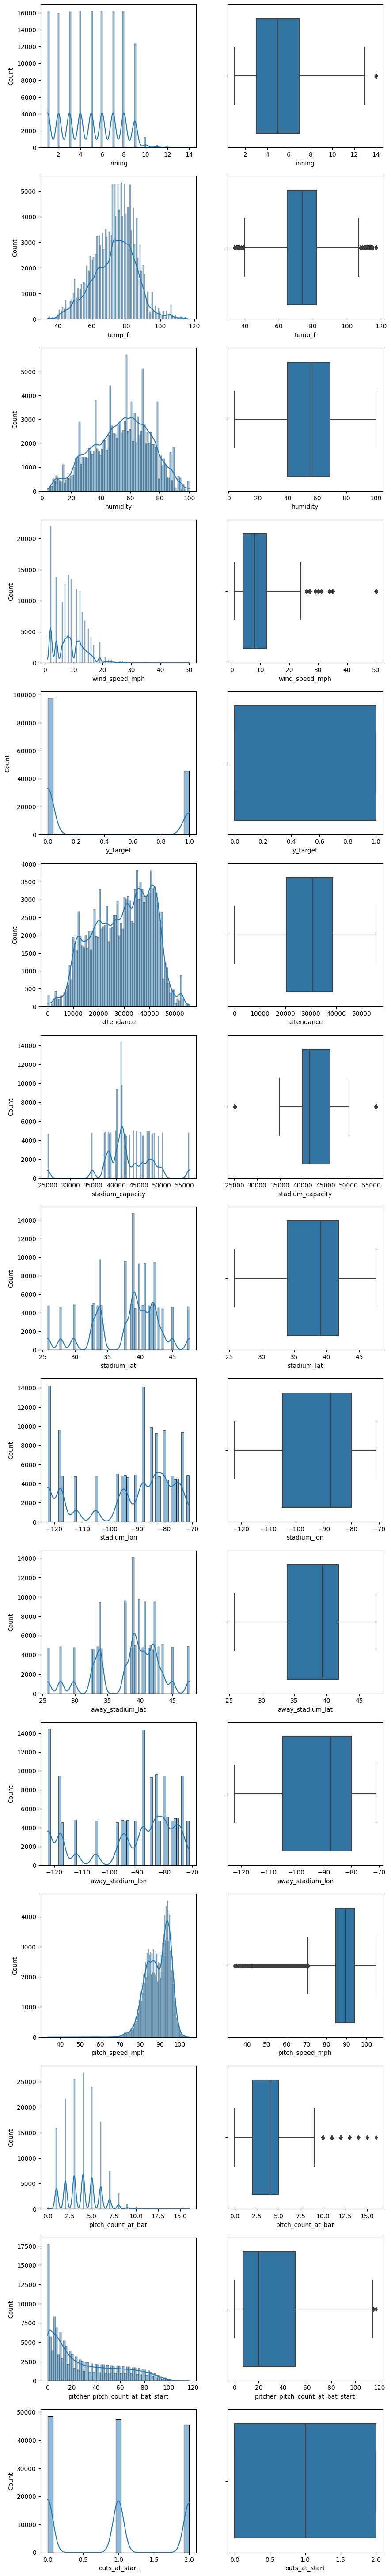

In [22]:
fig, axs = plt.subplots(len(df_cols),2)
fig.set_figwidth(10)
fig.set_figheight(len(df_cols)*5)

for i, c in enumerate(df_cols):
    ax=axs[i][0]
    ax2=axs[i][1]
    
    sns.histplot(data=data, x=c, ax=ax, kde=True)
    sns.boxplot(data=data, x=c, ax=ax2)
    
    ax.set(xlabel=c)
    ax2.set(xlabel=c)

plt.show();